## A Closer Look at Domestic Violence as recorded by LAPD Arrest Data

#### Summary 
This exploratory data analysis takes a closer look at DV-related data elements that are recorded in LAPD Arrest Data (January 1, 2010 to August 31, 2020) specifically on arrests categorized as "Against Family/Child". These types of arrests are labeled as FCDV-related arrests in this report. It is important to note that other arrest categories (I.e., Rape) may also be considered DV-related arrests. This EDA is part of an effort towards creating public health resources and educational information for residents of the City of Los Angeles. 

The DV-related data elements that are studied here are drawn from a Los Angeles County publication ['Domestic Violence Data Sources'](http://publichealth.lacounty.gov/ivpp/pdf_reports/DV%20Report/LA%20County%20Domestic%20Violence%20Data%20Sources%208.25.10.pdf). These include: 
* Number of DV-related arrests
* Type of offense, including murder, simple assault, sexual assault, and intimidation
* Victim/offender relationships
* Age, gender and race/ethnicity of victims and offenders
* Type of injury sustained by the victim
* Type of weapon
* Location where the crime occurred
* Number of victims and offenders involved in the incidents 

LAPD Arrest Data contains some of the elements above but not all. This EDA project will continue to look for data sources to merge towards building a larger dataset that may be insightful for understanding DV-related trends and patterns in the city. 

The datasets analyzed in this report comes from the Los Angeles Police Department (LAPD) and contain information on arrests in the city and details documented about the arrests. The datasets can be accessed through the Los Angeles Open Data [website](https://data.lacity.org/A-Safe-City/Arrest-Data-from-2020-to-Present/amvf-fr72). 

Update: An additional two datasets are introduced drawn from the FBI's [Crime Data Explorer (CDE)](https://crime-data-explorer.fr.cloud.gov/explorer/national/united-states/crime#about-the-data). CDE data is "derived from summary (SRS)  glossary lookup and incident (NIBRS)  glossary lookup reports voluntarily submitted to the FBI.


#### Data Highlights 
This report found several FCDV-related trends and patterns for the City of Los Angeles: 
* [FCVD Arrests in 2020](#fcdv2020)
* [FCVD Arrests Between 2010 and 2020](#fcdv2010)
* [Distribution of FCDV Arrests in 2019 and 2020](#dist201920)
* [Yearly Change in FCDV Arrests between 2010 and 2019](#yc)
* [Types of FCDV-related Charges](#charge)
* [Sex Data](#sex)
* [Neighborhood Data](#neighborhood)
* [Descent Data](#descent)
* [Age Data](#age)

### Table of Contents
* [Getting to Know the Dataset](#firstlook)
* [Data Pre-Processing](#cleaning)
* [Exploratory Data Analysis](#exploratory)


## Getting to Know the Datasets  <a class="anchor" id="firstlook"></a>

### Importing Libraries and Data <a class="anchor" id="importdata"></a>

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import datetime

In [2]:
# Importing data sources
lapd_2020 = pd.read_csv('/Users/mitzibandera/DV/Arrest_Data_from_2020_to_Present.csv')

In [3]:
# Importing data sources
lapd_2010_to_2019 = pd.read_csv('/Users/mitzibandera/DV/Arrest_Data_from_2010_to_2019.csv')

/Users/mitzibandera/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Importing data sources
cde_race_2019 = pd.read_csv('/Users/mitzibandera/DV/arrestee-race-2019.csv')

In [5]:
# Stacking the two data sources
lapd_data = pd.concat([lapd_2020,lapd_2010_to_2019], axis=0)

### Inspecting the Data <a class="anchor" id="inspectdata"></a>

By using different methods to view the dataset, we can begin to spot patterns, missing values and issues that need to be addressed. 

In [6]:
# Inspecting arrest data 
lapd_data.head()

,Report ID,Report Type,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,...,Disposition Description,Address,Cross Street,LAT,LON,Location,Booking Date,Booking Time,Booking Location,Booking Location Code
0,5999614,BOOKING,08/26/2020 12:00:00 AM,1505.0,14,Pacific,1494,34,M,B,...,NaN,400 WORLDWAY,NaN,33.9420,-118.4095,POINT (-118.4095 33.942),08/26/2020 12:00:00 AM,1815.0,PACIFIC,4214.0
1,202111570,RFC,07/09/2020 12:00:00 AM,1830.0,21,Topanga,2125,29,M,H,...,MISDEMEANOR COMPLAINT FILED,21900 ELKWOOD ST,NaN,34.2129,-118.6031,POINT (-118.6031 34.2129),NaN,NaN,NaN,NaN
2,202112432,RFC,07/29/2020 12:00:00 AM,1455.0,21,Topanga,2189,39,M,W,...,MISDEMEANOR COMPLAINT FILED,WINNETKA,VENTURA FY,34.1721,-118.5709,POINT (-118.5709 34.1721),NaN,NaN,NaN,NaN
3,6005088,BOOKING,09/03/2020 12:00:00 AM,2030.0,3,Southwest,314,19,M,H,...,NaN,24TH,ARLINGTON,34.0349,-118.3177,POINT (-118.3177 34.0349),09/03/2020 12:00:00 AM,2236.0,77TH ST,4212.0
4,201711929,RFC,07/23/2020 12:00:00 AM,1815.0,17,Devonshire,1752,39,M,H,...,MISDEMEANOR COMPLAINT FILED,DE SOTO,LASSEN,34.2500,-118.5886,POINT (-118.5886 34.25),NaN,NaN,NaN,NaN


In [7]:
# Inspecting arrest data 
lapd_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365547 entries, 0 to 1317756
Data columns (total 25 columns):
Report ID                   1365547 non-null int64
Report Type                 1365547 non-null object
Arrest Date                 1365547 non-null object
Time                        1365350 non-null float64
Area ID                     1365547 non-null int64
Area Name                   1365547 non-null object
Reporting District          1365547 non-null int64
Age                         1365547 non-null int64
Sex Code                    1365547 non-null object
Descent Code                1365547 non-null object
Charge Group Code           1273775 non-null object
Charge Group Description    1272403 non-null object
Arrest Type Code            1365546 non-null object
Charge                      1365547 non-null object
Charge Description          1275626 non-null object
Disposition Description     1254082 non-null object
Address                     1365547 non-null object
Cross 

In [8]:
# Inspecting charges in arrest data
lapd_data['Charge Group Description'].value_counts()

Miscellaneous Other Violations    251760
Narcotic Drug Laws                167386
Driving Under Influence           125560
Drunkeness                        116982
Aggravated Assault                 91827
Larceny                            72531
Other Assaults                     67913
Moving Traffic Violations          54783
Liquor Laws                        52923
Prostitution/Allied                41738
Disorderly Conduct                 37362
Weapon (carry/poss)                33220
Robbery                            28360
Vehicle Theft                      27400
Burglary                           25932
Sex (except rape/prst)             13883
Pre-Delinquency                    11910
Fraud/Embezzlement                 10009
Against Family/Child                8076
Forgery/Counterfeit                 7117
Non-Criminal Detention              7017
Receive Stolen Property             6937
Rape                                3128
Disturbing the Peace                3000
Gambling        

Our initial inspection of the lapd_data dataset shows that during the first nine months of 2020, more than 600 arrests were made that were labeled as "Against Family/Child." In the time span of 2010 to 2019 period, 8076 arrests were made in this category.  

In [9]:
# Inspecting data
cde_race_2019

,Key,Value
0,Asian,515
1,Native Hawaiian,80
2,Black or African American,18477
3,American Indian or Alaska Native,2846
4,White,40835
5,Unknown,439


## Data Pre-processing<a class="anchor" id="cleaning"></a>

First, we'll replace column names.

In [10]:
# Replacing the column names (making them lowercase)
lapd_data = lapd_data.rename(columns={'Report ID': 'id', 'Report Type': 'report_type', 'Arrest Date': 'arrest_date', 
                                        'Time': 'time', 'Area ID': 'area_id', 'Area Name': 'area',
                                       'Reporting District': 'reporting_district', 'Age': 'age', 'Sex Code': 'sex', 
                                       'Descent Code':'descent', 'Charge Group Code':'charge_code', 'Charge Group Description':'charge_group', 
                                        'Arrest Type Code': 'arrest_code', 'Charge': 'charge', 'Charge Description': 'charge_description',
                                       'Disposition Description': 'dispo_desc', 'Address': 'address', 'Cross Street': 'cross_street', 'LAT': 'latitude', 
                                       'LON':'longitude', 'Location':'location', 'Booking Date': 'booking_date', 'Booking Time': 'booking_time', 
                                        'Booking Location': 'booking_location', 'Booking Location Code':'booking_location_code'})

Earlier, we noticed that the arrest date information had different formats in both of the datasets. To make the values all have the same format, we will truncate the date to only show year, month and day and we'll also write code to format the datetime data type this way. 

In [11]:
# Truncate date 
lapd_data['arrest_date'] = pd.to_datetime(lapd_data.arrest_date).dt.date

In [12]:
# Format date
lapd_data['arrest_date'] = pd.to_datetime(lapd_data['arrest_date'], format = '%Y-%m-%d')

Disaggregating by month and year will help us to mine this data for meaningful patterns. In the code below, we extract the month and year an arrest was made and add this value to new columns called 'month' and 'year'. 

In [13]:
import warnings
warnings.filterwarnings("ignore")
# Extracting month and creating new column
lapd_data['month'] = pd.DatetimeIndex(lapd_data['arrest_date']).month

In [14]:
# Extracting year and creating new column
lapd_data['year'] = pd.DatetimeIndex(lapd_data['arrest_date']).year

We'll take a moment to confirm the time span that our merged dataset represents. 

In [15]:
# Date of first arrest recorded in arrest data
lapd_data['arrest_date'].min()

Timestamp('2010-01-01 00:00:00')

In [16]:
# Date of last arrest recorded in arrest data
lapd_data['arrest_date'].max()

Timestamp('2020-09-12 00:00:00')

At this stage, the lapd_data DataFrame contains information about all arrests made, not just those DV-related. We'll create a specific DataFrame that analyzes arrests categorized as "Against Family/Child". This new DataFrame is called dv_data and spans from 2010 to 2020. 

In [17]:
# Filtering dataset and creating a new dataset called data to only show specific arrests
dv_data = lapd_data[lapd_data['charge_group'] == 'Against Family/Child'] 

Using the isnull() method we can see that there are several values missing from this dataset. We may come back to replacing missing values depending on the direction of our EDA, however for now we can observe and take note of the columns below. 

In [18]:
# Looking for missing values using isnull()
print(dv_data.columns[dv_data.isnull().any()])

Index(['dispo_desc', 'cross_street', 'booking_date', 'booking_time',
       'booking_location', 'booking_location_code'],
      dtype='object')


We'll also create another new dataset for 2020 and discard data for the month of September since this month is not fully accounted for (the dataset runs only to September 12).

In [19]:
# Filtering dataset
dv_data_2020 = dv_data[dv_data['year'] == 2020] 

In [20]:
dv_data_2020 = dv_data_2020[dv_data_2020['month'] != 9] 

In [21]:
# Looking for missing values using isnull()
print(dv_data_2020.columns[dv_data_2020.isnull().any()])

Index(['dispo_desc', 'cross_street', 'booking_date', 'booking_time',
       'booking_location', 'booking_location_code'],
      dtype='object')


## Exploratory Data Analysis  <a class="anchor" id="exploratory"></a>

#### FCVD Arrests in 2020  <a class="anchor" id="fcdv2020"></a>

There were 603 FCDV arrests made in the first 8 months of 2020. 

In [38]:
len(dv_data_2020)

603

#### FCVD Arrests Between 2010 and 2020  <a class="anchor" id="fcdv2010"></a>

FCDV arrests were .6% of all arrest made between 2010 and 2020. 

In [39]:
# Calculating proportion
len(dv_data)/len(lapd_data) * 100

0.5914113538384251

#### Distribution of FCDV Arrests in 2019 and 2020  <a class="anchor" id="dist201920"></a>

Our pivot table below shows us that the number of FCDV arrests were relatively consistent in 2020. How similar or different are these numbers for other years? We'll find out in the next few steps. 

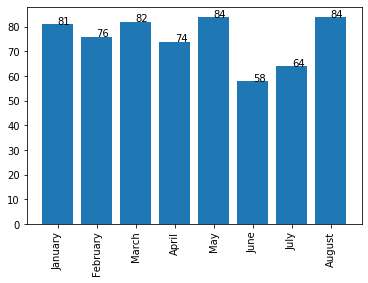

In [24]:
# Pivot table 
dv_data_2020_pivot = pd.pivot_table(dv_data_2020, index = ['month'],
                                values = ['id'], aggfunc = [len])
# Bar chart
x = ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August')
y = dv_data_2020_pivot[('len', 'id')]

plt.bar(x, y)

plt.xticks(x, rotation='vertical')

for a,b in zip(x, y):
    plt.text(a, b, str(b))
plt.show()

In [25]:
print('There was an average of', round(dv_data_2020_pivot[('len', 'id')].mean()), 'FCDV arrests made in the first eight months of 2020.')


There was an average of 75 FCDV arrests made in the first eight months of 2020.


We'll also take a closer look below at the distribution of FCDV arrests in 2019. 

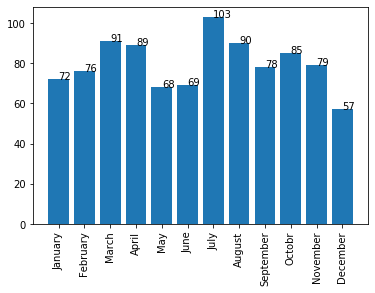

In [26]:
# Pivot table 
dv_data_pivot = pd.pivot_table(dv_data, index = ['year','month'],
                                values = ['id'], aggfunc = [len])
# Querying for 2019 
dv_2019 = dv_data_pivot.query('year in "2019"')
# # Bar chart
x = ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'Octobr', 'November', 'December')
y = dv_2019[('len', 'id')]

plt.bar(x, y)

plt.xticks(x, rotation='vertical')

for a,b in zip(x, y):
    plt.text(a, b, str(b))
plt.show()

In [27]:
print('There was an average of', round(dv_2019[('len', 'id')].mean()), 'FCDV arrests made per month in 2019.')


There was an average of 80 FCDV arrests made per month in 2019.


#### Yearly Change in FCDV Arrests between 2010 and 2019  <a class="anchor" id="yc"></a>

Next, we'll step back a bit and look at the distribution of FCDV arrests from 2010 to 2019. By visualizing the number of yearly FCDV arrests on a bart chart, we see an increase in numbers from 2010 to 2019. 

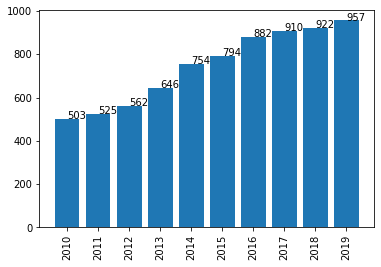

In [28]:
# Pivot table 
dv_data_pivot_year = pd.pivot_table(dv_data, index = ['year'],
                                values = ['id'], aggfunc = [len])
# Filtering out the year 2020 since it is not complete at this time
dv_data_pivot_year = dv_data_pivot_year[dv_data_pivot_year[('len', 'id')] != 621] 
# Bar chart
x = ('2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019')
y = dv_data_pivot_year[('len', 'id')]

plt.bar(x, y)

plt.xticks(x, rotation='vertical')

for a,b in zip(x, y):
    plt.text(a, b, str(b))
plt.show()

The bar chart below shows the yearly growth in FCDV arrests as percentages. We see that the number of FCDV arrests had a significant increase from the year 2013 to 2014. 

posx and posy should be finite values
posx and posy should be finite values


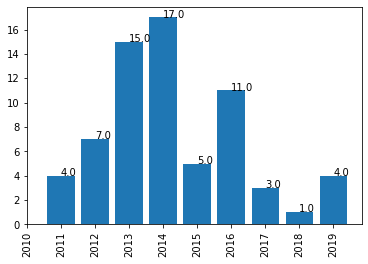

In [29]:
# Calculating yearly change as a percentage 
dv_data_pivot_year[['YC']]=round((dv_data_pivot_year[[('len', 'id')]].pct_change())*100)
# Bar chart
x = ('2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019')
y = dv_data_pivot_year[('YC')]

plt.bar(x, y)

plt.xticks(x, rotation='vertical')

for a,b in zip(x, y):
    plt.text(a, b, str(b))
plt.show()

#### Types of FCDV-related Charges  <a class="anchor" id="charge"></a>

Using the value_counts() method, we can take an even closer look at the types of charges related to the arrests categorized as "Against Family/Child". We see that the overwhelming charges are described as "Disobey Domestic Relations Court Order", this observation is true for the year 2020 and also the dataset spanning 2010 to 2019. 

In [30]:
dv_data.groupby('charge_description')['charge_description'].agg(['count']).sort_values(by = 'count', ascending = False)


,count
charge_description,
DISOBEY DOMESTIC RELATIONS COURT ORDER,7582
ATTEMPT WILLFUL CRUELTY TO CHILD,283
CHILD STEALING,88
FAILURE TO PROVIDE FOR MINOR CHILD,22
HARMFUL MATTER SENT: SEDUCTION OF MINOR,20
DEPRIVE CUSTODY/VISIT IN VIOL OF CRT ORD,19
VIOLATION OF CUSTODY DECREE,19
VIOL COURT ORD TO PREV DOMESTIC VIOL W/PR,18
FAILURE TO PROVIDE FOR AFTER AJUDICATION,7


In [31]:
dv_data_2020.groupby('charge_description')['charge_description'].agg(['count']).sort_values(by = 'count', ascending = False)


,count
charge_description,
DISOBEY DOMESTIC RELATIONS COURT ORDER,586
ATTEMPT WILLFUL CRUELTY TO CHILD,8
CHILD STEALING,4
HARMFUL MATTER SENT: SEDUCTION OF MINOR,3
FAILURE TO PROVIDE FOR MINOR CHILD,1
VIOLATION OF CUSTODY DECREE,1


#### Sex Data <a class="anchor" id="sex"></a>

Males account for 82% of FCDV arrests between 2010 and 2020. 

In [32]:
dv_data['sex'].value_counts()

M    6602
F    1474
Name: sex, dtype: int64

In [33]:
print(round((len(dv_data.query('sex in "M"')) / 
       (len(dv_data.query('sex in "M"')) + 
        len(dv_data.query('sex in "F"'))))*100), '% Males')

82 % Males


#### Neighborhood Data<a class="anchor" id="neighborhood"></a>

The area 77th Street has the highest number of recorded FCDV arrests between 2010 and 2020. Specifically just in the year 2020, the Newton area has the highest number of recorded FCDV arrests. 

In [34]:
dv_data['area'].sort_values().value_counts().head(4)

77th Street    724
Hollenbeck     595
Southwest      517
Mission        503
Name: area, dtype: int64

In [35]:
dv_data_2020['area'].sort_values().value_counts().head(4)

Newton         64
Southwest      49
77th Street    48
Mission        45
Name: area, dtype: int64

#### Descent Data <a class="anchor" id="descent"></a>

In [36]:
dv_data['descent'].sort_values().value_counts()

H    4489
B    1814
W    1319
O     442
C       5
F       4
J       2
I       1
Name: descent, dtype: int64

#### Age Data  <a class="anchor" id="age"></a>

In [37]:
dv_data['age'].sort_values().value_counts()

28    323
25    314
29    300
26    291
27    291
     ... 
81      1
2       1
74      1
75      1
4       1
Name: age, Length: 74, dtype: int64